 <h1 style="font-family:'Times New Roman'; font-size:40px;font-weight:bold; color:forestgreen;"><u> AIR QUALITY AND HEALTH IMPACTS </u></h1>

<h4 style="font-family:'Times New Roman';font-size:20px;color:darkblue;font-weight:bold">Project by Kiran Balakrishnan</h4>

### **ABSTRACT**
#### This project analyses the relation between air quality and public health using a dataset combining pollutant levels, weather factors,

#### mobility patterns, and healthcare utilisation. After cleaning and preprocessing the data (standardising formats, imputing missing values),   

#### exploratory data analysis with statistical summaries, correlations, and visualisations was conducted.  

#### The results show that higher pollutant  concentrations are generally associated with increased respiratory admissions and hospital visits,   

#### though the strength of these relationships varies. Weather and mobility factors also play a role, highlighting the need for 

#### integrated environmental and health monitoring.

### **OBJECTIVES**

#### -- How does air quality correlates with respiratory related hospital visits
#### -- Role of weather conditions in Air Quality and Health
#### -- Impact on Mobility patterns in Air Quality

### **DATASET**

#### -> Rows : 3500

#### -> Columns : 26

#### -> Columns Include: 
#### Air Quality Indicators (AQI,PM2.5,PM10,NO2,SO2,CO,O3)
#### Weather (Temperature, Wind Speed, Precipitation)
#### Mobility and Lockdown
#### Industrial, Construction activities and Healthcare utilizations
        
#### The Dataset simulates a real-world public health and environmental monitoring scenario.  The data is synthetically generated using realistic 

#### statistical distributions and public domain references to ensure plausible behaviour while protecting real-world privacy

#### Source : https://www.kaggle.com/datasets/khushikyad001/air-quality-weather-and-respiratory-health


### **SETUPS AND LIBRARIES**

##### for data cleaning, transformation, and statistical analysis

In [2]:
import pandas as pd
import numpy as np

##### for visualisations

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

##### The Dataset is imported to a Dataframe (using Pandas)

In [4]:
#Importing 
df_pro = pd.read_csv('air_quality_health_dataset_dirty.csv') 

### **DESCRIPTION OF DATA**

##### Displaying first three records and last three records of the data using head() and tail() functions

In [5]:
df_pro.head(3)

,date,region,AQI,PM2.5,PM10,NO2,SO2,CO,O3,temperature,...,school_closures,public_transport_usage,mask_usage_rate,lockdown_status,industrial_activity,vehicle_count,construction_activity,respiratory_admissions,population_density,green_cover_percentage
0,01-01-2020,East#,109.934283,31.382887,57.718373,47.654022,25.874070,0.956973,32.574682,37.555663,...,0.0,43.103376,75.706162,0.0,66.098466,9757.0,63.001573,11.0,1957.637287,42.348419
1,2020-01-02,Central #,97.234714,47.094225,67.381383,50.734127,10.605095,0.990203,23.749138,24.900342,...,0.0,30.606591,69.652802,0.0,107.686174,9157.0,6.417798,13.0,2962.769470,27.712735
2,2020/01/03,East,112.953771,53.795917,NaN,44.986899,18.361025,1.019288,35.530851,23.437165,...,0.0,13.037424,82.561183,1.0,77.445192,2058.0,66.001849,3.0,6912.007043,41.031516


In [6]:
df_pro.tail(3)

,date,region,AQI,PM2.5,PM10,NO2,SO2,CO,O3,temperature,...,school_closures,public_transport_usage,mask_usage_rate,lockdown_status,industrial_activity,vehicle_count,construction_activity,respiratory_admissions,population_density,green_cover_percentage
3497,"Aug 28, 2021",Central,84.254360,57.921834,113.357278,47.163372,24.900944,1.041261,46.588535,25.692697,...,2.0,85.310358,69.949202,0.0,NaN,1931.0,42.600783,9.0,9175.634966,17.999196
3498,22-09-2020,north,122.830616,51.077691,43.180973,38.326740,15.944465,1.446009,26.356171,26.909990,...,NaN,45.152603,99.160931,2.0,70.072807,7541.0,16.243385,NaN,NaN,56.852711
3499,2020/10/11,west,NaN,51.846805,NaN,30.949345,22.942876,0.871523,37.145544,27.071062,...,1.0,37.783557,58.469405,0.0,132.367589,2413.0,17.226377,10.0,8193.727941,66.399549


##### Finding the total Number of Null values in each column using functions isna() and sum()

In [7]:
df_pro.isna().sum()

date                       54
region                      3
AQI                       127
PM2.5                     125
PM10                      128
NO2                        57
SO2                        54
CO                         58
O3                         61
temperature                56
humidity                   52
wind_speed                 57
precipitation              57
hospital_visits            59
emergency_visits           57
mobility_index             55
school_closures            55
public_transport_usage     58
mask_usage_rate            57
lockdown_status            58
industrial_activity        57
vehicle_count              58
construction_activity      51
respiratory_admissions     59
population_density         56
green_cover_percentage     59
dtype: int64


##### Displaying the informations of the columns such as datatypes and non null value counts using info() function


In [8]:
df_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    3446 non-null   object 
 1   region                  3497 non-null   object 
 2   AQI                     3373 non-null   float64
 3   PM2.5                   3375 non-null   float64
 4   PM10                    3372 non-null   float64
 5   NO2                     3443 non-null   float64
 6   SO2                     3446 non-null   float64
 7   CO                      3442 non-null   float64
 8   O3                      3439 non-null   float64
 9   temperature             3444 non-null   float64
 10  humidity                3448 non-null   float64
 11  wind_speed              3443 non-null   float64
 12  precipitation           3443 non-null   float64
 13  hospital_visits         3441 non-null   float64
 14  emergency_visits        3443 non-null   

##### Displaying the summary statistics of the numeric columns using describe() function

In [9]:
df_pro.describe()

,AQI,PM2.5,PM10,NO2,SO2,CO,O3,temperature,humidity,wind_speed,...,school_closures,public_transport_usage,mask_usage_rate,lockdown_status,industrial_activity,vehicle_count,construction_activity,respiratory_admissions,population_density,green_cover_percentage
count,3373.000000,3375.000000,3372.000000,3443.000000,3446.000000,3442.000000,3439.000000,3444.000000,3448.000000,3443.000000,...,3445.000000,3442.000000,3443.000000,3442.000000,3443.000000,3442.000000,3449.000000,3441.000000,3444.000000,3441.000000
mean,100.673199,59.437971,80.117249,39.738790,20.128518,1.004180,29.974690,24.952639,55.151980,7.450231,...,0.203193,49.911766,74.953125,0.226612,100.218633,5477.144393,48.807855,9.932578,4984.491614,37.399380
std,19.690801,15.186001,20.527489,9.869861,4.979140,0.301647,7.981959,4.899340,20.335826,4.301698,...,0.578296,28.555328,14.390498,0.554824,28.945086,2565.218917,29.085212,3.233202,2825.520707,18.851822
min,35.174653,12.349443,3.266889,0.775997,3.352481,0.000000,0.000000,6.724567,17.017413,-0.361107,...,0.000000,-3.364295,48.908037,0.000000,46.487666,1005.000000,-3.140965,0.000000,-467.599060,1.455964
25%,87.537189,49.318897,66.234647,33.157815,16.729634,0.797192,24.573390,21.500562,37.022775,3.705290,...,0.000000,25.698229,62.192063,0.000000,74.862579,3272.000000,23.023501,8.000000,2552.282893,21.091390
50%,100.426233,59.467878,79.672085,39.766060,20.109333,1.006834,29.981541,24.953930,55.489158,7.452827,...,0.000000,49.425788,75.215478,0.000000,100.282446,5447.500000,48.745056,10.000000,4948.226816,37.681231
75%,113.587466,69.693718,94.294704,46.344556,23.483727,1.210601,35.561728,28.187514,72.645461,11.102928,...,0.000000,75.057049,87.302268,0.000000,125.662793,7670.500000,74.440586,12.000000,7408.607572,53.434880
max,178.524754,108.646395,151.284304,74.627000,37.144552,2.343725,61.538648,43.056750,92.432677,15.320259,...,4.000000,102.842135,100.756621,4.000000,152.565953,9998.000000,103.150244,23.000000,10456.413261,73.547188


### **CLEANING**

##### Removing duplicates using the function drop_duplicates()

In [10]:
df_pro.drop_duplicates()

,date,region,AQI,PM2.5,PM10,NO2,SO2,CO,O3,temperature,...,school_closures,public_transport_usage,mask_usage_rate,lockdown_status,industrial_activity,vehicle_count,construction_activity,respiratory_admissions,population_density,green_cover_percentage
0,01-01-2020,East#,109.934283,31.382887,57.718373,47.654022,25.874070,0.956973,32.574682,37.555663,...,0.0,43.103376,75.706162,0.0,66.098466,9757.0,63.001573,11.0,1957.637287,42.348419
1,2020-01-02,Central #,97.234714,47.094225,67.381383,50.734127,10.605095,0.990203,23.749138,24.900342,...,0.0,30.606591,69.652802,0.0,107.686174,9157.0,6.417798,13.0,2962.769470,27.712735
2,2020/01/03,East,112.953771,53.795917,NaN,44.986899,18.361025,1.019288,35.530851,23.437165,...,0.0,13.037424,82.561183,1.0,77.445192,2058.0,66.001849,3.0,6912.007043,41.031516
3,2020-01-04,West,130.460597,88.315315,69.040084,20.575023,19.791700,1.284058,25.277106,22.388200,...,0.0,8.974779,73.642836,0.0,51.864000,8726.0,79.580923,6.0,9227.543628,40.543537
4,2020/01/05,south#,95.316933,68.348297,75.716994,38.445776,20.079543,0.775835,35.996440,26.881835,...,1.0,96.022689,68.688106,0.0,148.714488,9720.0,6.301105,8.0,1277.810175,5.648920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,2020/06/03,EAST,120.052662,45.079305,77.455096,NaN,21.603121,1.284065,19.573188,25.893830,...,2.0,38.466266,67.288113,0.0,146.487731,5141.0,82.066217,10.0,9150.976496,5.206652
3496,17-07-2020,South,120.701431,88.052115,86.500488,29.360828,14.241104,1.025482,29.618122,27.556137,...,NaN,89.516325,66.878971,2.0,68.592547,8517.0,91.907932,NaN,6764.250068,26.758697
3497,"Aug 28, 2021",Central,84.254360,57.921834,113.357278,47.163372,24.900944,1.041261,46.588535,25.692697,...,2.0,85.310358,69.949202,0.0,NaN,1931.0,42.600783,9.0,9175.634966,17.999196
3498,22-09-2020,north,122.830616,51.077691,43.180973,38.326740,15.944465,1.446009,26.356171,26.909990,...,NaN,45.152603,99.160931,2.0,70.072807,7541.0,16.243385,NaN,NaN,56.852711


#### Filling null values with functions fillna(), mode(), median(), and mean(). For categorical columns using mode, and for numerical columns 

#### using mean and median. Median is used for the values that have high variance or large outliers, and mean is used where the outliers  

#### are comparatively less. Here mostly all the numerical columns are balanced, so used the mean for most of the columns and used   

#### median for the AQI, mode is used for the date, region, school closures and lockdown status

#### Also, everything is assigned to a new dataframe df_pro2 after cleaning

In [11]:
df_pro2 = df_pro.fillna({'date':df_pro['date'].mode()[0],
                         'region':df_pro['region'].mode()[0],
                         'PM2.5':df_pro['PM2.5'].mean(),
                         'PM10':df_pro['PM10'].mean(),
                         'NO2':df_pro['NO2'].mean(),
                         'SO2':df_pro['SO2'].mean(),
                         'CO':df_pro['CO'].mean(),
                         'O3':df_pro['O3'].mean(),
                         'temperature':df_pro['temperature'].mean(),
                         'humidity':df_pro['humidity'].mean(),
                         'wind_speed':df_pro['wind_speed'].mean(),
                         'precipitation':df_pro['precipitation'].mean(),
                         'hospital_visits':df_pro['hospital_visits'].median(),
                         'emergency_visits':df_pro['emergency_visits'].mean(),
                         'mobility_index':df_pro['mobility_index'].mean(),
                         'public_transport_usage':df_pro['public_transport_usage'].mean(),
                         'industrial_activity':df_pro['industrial_activity'].mean(),
                         'vehicle_count':df_pro['vehicle_count'].mean(),
                         'construction_activity':df_pro['construction_activity'].mean(),
                         'respiratory_admissions':df_pro['respiratory_admissions'].median(),
                         'population_density':df_pro['population_density'].mean(),
                         'green_cover_percentage':df_pro['green_cover_percentage'].mean(),
                         'mask_usage_rate':df_pro['mask_usage_rate'].mean(),
                         'school_closures':df_pro['school_closures'].mode()[0],
                         'lockdown_status':df_pro['lockdown_status'].mode()[0],
                         'AQI':df_pro['AQI'].median()
                        })

In [12]:
df_pro2.isna().sum() #Checking if there is any null values are there in each columns

date                      0
region                    0
AQI                       0
PM2.5                     0
PM10                      0
NO2                       0
SO2                       0
CO                        0
O3                        0
temperature               0
humidity                  0
wind_speed                0
precipitation             0
hospital_visits           0
emergency_visits          0
mobility_index            0
school_closures           0
public_transport_usage    0
mask_usage_rate           0
lockdown_status           0
industrial_activity       0
vehicle_count             0
construction_activity     0
respiratory_admissions    0
population_density        0
green_cover_percentage    0
dtype: int64

#### Changing the datatypes of date and region. The date column have different formats of dates and the datatype is not assigned.

#### So using to_datetime() function to change the datatype with the parcer format = mixed since the columns has multiple date formats

#### For region column using astype() function to change the datatype to string

In [13]:
df_pro2['date'] = pd.to_datetime(df_pro2['date'],format='mixed')

In [14]:
df_pro2['region'] = df_pro2['region'].astype('string')

#### Checking for the unwanted characters in the region column using unique()

In [15]:
df_pro2['region'].unique()

<StringArray>
[    ' East# ', ' Central # ',      ' East ',      ' West ',      'south#',
       'SOUTH',     ' WEST #',      ' WEST ',    ' North# ',    ' South# ',
     ' South ',       'north',   ' Central ',   ' CENTRAL ',        'west',
     ' West# ',     ' North ',        'EAST',     'CENTRAL',       'south',
   ' South # ',        'WEST',      'SOUTH#',       'west#',       'NORTH',
        'east',     ' SOUTH ',     ' south ',       'WEST#',    'CENTRAL#',
      ' east ',    ' NORTH #',     ' NORTH ',     ' north ',      ' EAST ',
  ' Central# ',     'central',     ' EAST #',      'north#',     ' west #',
       'EAST#',    'central#',      'NORTH#',    ' West # ',    ' north #',
    ' south #',    ' East # ',  ' central #',      ' west ',   ' central ',
     ' east #',       'east#',   ' North # ',    ' SOUTH #',  ' CENTRAL #',
       ' Nan ',      ' NAN #',      ' nan #',      ' Nan# ',         'NAN',
        'NAN#',       ' nan ',       ' NAN ']
Length: 63, dtype: string

#### Removing unwanted characters and spaces at the starting and ending using replace() and strip()

#### Since unwanted charatcers are the part of string using .str.replace()

#### For other strings like Nan using .replace() to replace it completely with the mode value

In [16]:
df_pro2['region'] = df_pro2['region'].str.replace('#','')
df_pro2['region'] = df_pro2['region'].str.strip()

In [17]:
df_pro2['region'] = df_pro2['region'].replace({'Nan':df_pro2['region'].mode()[0],
                           'NAN':df_pro2['region'].mode()[0],
                           'nan':df_pro2['region'].mode()[0],
                          })

In [18]:
df_pro2['region'].unique() #Checking for abnormalities

<StringArray>
[   'East', 'Central',    'West',   'south',   'SOUTH',    'WEST',   'North',
   'South',   'north', 'CENTRAL',    'west',    'EAST',   'NORTH',    'east',
 'central']
Length: 15, dtype: string

#### Capitalizing the region column using title()

In [19]:
df_pro2['region'] = df_pro2['region'].str.title()

In [20]:
df_pro2['region'].unique()

<StringArray>
['East', 'Central', 'West', 'South', 'North']
Length: 5, dtype: string

#### The school_closures and lockdown_status column have values 0 & 1 referring No & Yes respectively 

#### So replacing other values from the columns with mode of the column using replace() and mode()

In [21]:
df_pro2['school_closures'] = df_pro2['school_closures'].replace({2:df_pro['school_closures'].mode()[0],
                                    3:df_pro['school_closures'].mode()[0],
                                    4:df_pro['school_closures'].mode()[0]})
df_pro2['lockdown_status'] = df_pro2['lockdown_status'].replace({2:df_pro['lockdown_status'].mode()[0],
                                    3:df_pro['lockdown_status'].mode()[0],
                                    4:df_pro['lockdown_status'].mode()[0]})

In [22]:
df_pro2['school_closures'].unique() #Checking for anomalies

array([0., 1.])

In [23]:
df_pro2['lockdown_status'].unique() #Checking for anomalies

array([0., 1.])

#### Replacing the 1 & 0 with Yes and No respectively

In [24]:
df_pro2['school_closures'] = df_pro2['school_closures'].replace({0:'No',
                                                                 1:'Yes'})
df_pro2['lockdown_status'] = df_pro2['lockdown_status'].replace({0:'No',
                                                                 1:'Yes'})

#### Changing the datatypes to string using astype()

In [25]:
df_pro2['school_closures'] = df_pro2['school_closures'].astype('string')
df_pro2['lockdown_status'] = df_pro2['lockdown_status'].astype('string')

In [26]:
df_pro2.info() #checking the datatypes and non null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    3500 non-null   datetime64[ns]
 1   region                  3500 non-null   string        
 2   AQI                     3500 non-null   float64       
 3   PM2.5                   3500 non-null   float64       
 4   PM10                    3500 non-null   float64       
 5   NO2                     3500 non-null   float64       
 6   SO2                     3500 non-null   float64       
 7   CO                      3500 non-null   float64       
 8   O3                      3500 non-null   float64       
 9   temperature             3500 non-null   float64       
 10  humidity                3500 non-null   float64       
 11  wind_speed              3500 non-null   float64       
 12  precipitation           3500 non-null   float64 

#### Deriving a new column for showing the severity of the health impacts related to air quality

#### which uses the AQI and hospital_visits 

#### The health_impact_level column is derived using a user defined function, which takes the AQI and Hospital visits as parameters

#### if AQI is more than 200 and Respiratory admissions is more than 20 it returns Severe

#### if AQI is more than 150 and Respiratory admissions is more than 15 it returns High

#### if AQI is more than 100 and Respiratory admissions is more than 10 it returns Moderate

#### otherwise it will return low

#### Applied this function to the dataframe using apply() and lambda along column

In [27]:
def health_score(aqi, hosp):
    if aqi > 200 or hosp > 20:
        return "Severe"
    elif aqi > 150 or hosp > 15:
        return "High"
    elif aqi > 100 or hosp > 10:
        return "Moderate"
    else:
        return "Low"
df_pro2['health_impact_level'] = df_pro2.apply(lambda x:health_score(x['AQI'],x['respiratory_admissions']),axis=1)

In [28]:
df_pro2['health_impact_level'] #Displaying the Health impact Level column

0       Moderate
1       Moderate
2       Moderate
3       Moderate
4            Low
          ...   
3495    Moderate
3496    Moderate
3497         Low
3498    Moderate
3499    Moderate
Name: health_impact_level, Length: 3500, dtype: object

##### Displaying the records where the Health Impact level is Severe

In [29]:
df_pro2[df_pro2['health_impact_level'] == 'Severe']

,date,region,AQI,PM2.5,PM10,NO2,SO2,CO,O3,temperature,...,public_transport_usage,mask_usage_rate,lockdown_status,industrial_activity,vehicle_count,construction_activity,respiratory_admissions,population_density,green_cover_percentage,health_impact_level
839,2020-04-19,South,95.720223,55.345384,74.839829,27.776354,21.791499,0.806557,22.380813,30.458817,...,17.363804,69.695473,No,54.815012,9179.0,23.657610,22.0,2022.521491,45.060239,Severe
1764,2020-10-31,South,95.078750,45.083572,109.357009,55.564160,20.199533,0.975959,29.645919,16.701323,...,61.089121,61.426307,Yes,134.843100,3164.0,99.750273,21.0,6647.081627,45.995669,Severe
2643,2021-03-29,East,86.958222,80.387842,83.697173,10.332469,17.398955,1.426678,39.943602,26.590712,...,22.806398,89.480838,Yes,109.733834,4120.0,65.773562,21.0,7729.973601,35.300061,Severe
2836,2021-10-08,East,138.082732,31.429880,69.080761,39.776915,21.326285,1.133513,29.712717,29.722499,...,36.770379,51.457951,No,66.439594,5974.0,58.910725,21.0,6670.683796,52.928124,Severe
2874,2021-11-15,Central,99.378821,79.065980,89.266030,36.435729,23.070529,0.241599,43.954490,16.935745,...,77.417349,56.751667,Yes,136.727644,4959.0,35.775201,23.0,9729.621233,61.741663,Severe
3064,2021-03-19,Central,100.426233,63.275074,65.850302,39.738790,14.617898,0.829973,25.187887,22.846235,...,0.597366,56.134648,No,82.645945,8900.0,53.808565,21.0,9281.827673,51.881710,Severe


### **EDA**

<h3 style="color:darkslateblue">Univariate Analysis</h3>

<h3 style="color:DarkSlateGray;">Finding the date range of the Analysis</h3>

In [30]:
print(df_pro2.sort_values('date').iloc[0,0])
print(df_pro2.sort_values('date').iloc[3499,0])

2020-01-01 00:00:00
2022-01-26 00:00:00


<h3 style="color:DarkSlateGray;">The summary statistics of AQI </h3>

In [31]:
df_pro2['AQI'].describe()

count    3500.000000
mean      100.664237
std        19.330204
min        35.174653
25%        87.970952
50%       100.426233
75%       112.946382
max       178.524754
Name: AQI, dtype: float64

##### ->The distribution of AQI is spreaded as the average AQI is 100, 
##### ->The max AQI is 178
##### ->The min AQI is 35. 
##### ->The standard deviation is 19.33

<h3 style="color:DarkSlateGray;">Total Hospital visits in the 2 year

In [32]:
df_pro2['hospital_visits'].sum()

70150.0

<h3 style="color:DarkSlateGray;">Total respiratory issues admitted in 2 year</h3>

In [33]:
df_pro2['respiratory_admissions'].sum()

34768.0

<h3 style="color:DarkSlateGray;">Total days of Lockdown in 2 year</h3>

In [34]:
df_pro2['lockdown_status'].value_counts()['Yes']

510

<h3 style="color:DarkSlateGray;">The impact of AQI in Health</h3>

In [35]:
df_pro2['health_impact_level'].value_counts()

health_impact_level
Moderate    2340
Low          962
High         192
Severe         6
Name: count, dtype: int64

#### The impact on health became severe 6 times , mostly it stays in the moderate level 

<h3 style="color:darkslateblue"> Bivariate Analysis</h3>

In [36]:
df_reg = df_pro2.groupby('region')
df_date = df_pro2.groupby('date')

#### Grouped by region and date

In [37]:
date_join = pd.concat([
            df_date['AQI'].mean(),
            df_date['temperature'].median(),
            df_date['humidity'].median(),
            df_date['wind_speed'].median(),
            df_date['precipitation'].median(),
            df_date['respiratory_admissions'].sum(),
            df_date['industrial_activity'].mean(),
            df_date['construction_activity'].mean(),
            df_date['vehicle_count'].mean(),
            df_date['green_cover_percentage'].mean(),
            df_date['mask_usage_rate'].mean()],          
            axis=1
                     )

<h3 style="color:DarkSlateGray;">Correlation between AQI and Industrial Activity</h3>

In [38]:
df_pro2[['AQI','industrial_activity']].corr()

,AQI,industrial_activity
AQI,1.000000,-0.019041
industrial_activity,-0.019041,1.000000


#### The correlation shows the AQI and industrial activities are inversely proportional

<h3 style="color:DarkSlateGray;">Region wise average AQI</h3>

In [39]:
aq = df_reg['AQI'].mean()
aq

region
Central     99.568314
East       102.355955
North       99.092221
South      100.252688
West       101.891359
Name: AQI, dtype: float64

#### The average AQI is highest in East region and lowest in North region even the difference is small

<h3 style="color:DarkSlateGray;">Total number of Hospital visits in each Region</h3>

In [40]:
hv = df_reg['hospital_visits'].sum()
hv

region
Central    13873.0
East       14523.0
North      13221.0
South      14169.0
West       14364.0
Name: hospital_visits, dtype: float64

#### Hospital visits are Highest in the East region and Lowest in North region

<h3 style="color:DarkSlateGray;">Total respiratory admissions in each Region</h3>

In [41]:
ra = df_reg['respiratory_admissions'].sum()
ra

region
Central    6724.0
East       7030.0
North      6585.0
South      7114.0
West       7315.0
Name: respiratory_admissions, dtype: float64

#### Respiratory admissions are highest in West region and lowest in North region

<h3 style="color:DarkSlateGray;">Average industrial activity in different regions</h3>

In [42]:
ia = df_reg['industrial_activity'].mean()
ia

region
Central     98.694609
East        98.789234
North      103.195264
South      100.757992
West        99.809813
Name: industrial_activity, dtype: float64

#### Industrial activity is high in North region and low in Central region '''

<h3 style="color:DarkSlateGray;">Average Construction activity in different regions</h3>

In [43]:
ca = df_reg['construction_activity'].mean()
ca

region
Central    49.480783
East       49.207310
North      47.608751
South      48.409382
West       49.270907
Name: construction_activity, dtype: float64

#### Construction activity is high in Central region and low in North region'''

<h3 style="color:DarkSlateGray;">Average vehicles in each Region</h3>

In [44]:
vc = df_reg['vehicle_count'].mean()
vc

region
Central    5705.602180
East       5455.680384
North      5353.378828
South      5368.965869
West       5501.528356
Name: vehicle_count, dtype: float64

#### Central region has more vehicle and North region has less vehicle comparing to other regions'''

<h3 style="color:DarkSlateGray;">Green cover in different regions</h3>

In [45]:
gc = df_reg['green_cover_percentage'].mean()
gc

region
Central    36.415215
East       37.186056
North      37.332076
South      38.490405
West       37.537002
Name: green_cover_percentage, dtype: float64

#### Central region has less green cover and South region has more green cover compare to other regions'''

<h3 style="color:DarkSlateGray;">Average Mask usage rate</h3>

In [46]:
mu = df_reg['mask_usage_rate'].mean()
mu

region
Central    74.064536
East       75.142783
North      75.187753
South      74.940612
West       75.409579
Name: mask_usage_rate, dtype: float64

#### People in West,North and East region uses masks more often'''

In [47]:
#merging the previous dfs to single one
merged  = pd.concat([aq,hv,ra,ia,ca,vc,gc,mu,
            df_reg['temperature'].median(),
            df_reg['humidity'].median(),
            df_reg['wind_speed'].median(),
            df_reg['precipitation'].median(),
            df_reg['respiratory_admissions'].sum()],
            axis=1
                   )
merged.reset_index(inplace=True)
merged

,region,AQI,hospital_visits,respiratory_admissions,industrial_activity,construction_activity,vehicle_count,green_cover_percentage,mask_usage_rate,temperature,humidity,wind_speed,precipitation,respiratory_admissions
0,Central,99.568314,13873.0,6724.0,98.694609,49.480783,5705.602180,36.415215,74.064536,25.132543,55.151980,7.537969,4.980705,6724.0
1,East,102.355955,14523.0,7030.0,98.789234,49.207310,5455.680384,37.186056,75.142783,24.808830,55.151980,7.422404,5.177375,7030.0
2,North,99.092221,13221.0,6585.0,103.195264,47.608751,5353.378828,37.332076,75.187753,25.109687,55.986051,7.450231,4.708357,6585.0
3,South,100.252688,14169.0,7114.0,100.757992,48.409382,5368.965869,38.490405,74.940612,24.653331,52.407187,7.450231,4.980705,7114.0
4,West,101.891359,14364.0,7315.0,99.809813,49.270907,5501.528356,37.537002,75.409579,24.952639,58.062195,7.450231,4.980705,7315.0


In [48]:
#merging the values from the date grouped data
date_join = pd.concat([
            df_date['AQI'].mean(),
            df_date['temperature'].median(),
            df_date['humidity'].median(),
            df_date['wind_speed'].median(),
            df_date['precipitation'].median(),
            df_date['respiratory_admissions'].sum(),
            df_date['industrial_activity'].mean(),
            df_date['construction_activity'].mean(),
            df_date['vehicle_count'].mean(),
            df_date['green_cover_percentage'].mean(),
            df_date['mask_usage_rate'].mean()],          
            axis=1
                     )
date_join.reset_index(inplace=True)
date_join.head(3)
                      
         

,date,AQI,temperature,humidity,wind_speed,precipitation,respiratory_admissions,industrial_activity,construction_activity,vehicle_count,green_cover_percentage,mask_usage_rate
0,2020-01-01,92.948587,31.215518,34.945222,2.379946,5.835113,55.0,98.531456,57.380357,6202.4,36.202792,66.554486
1,2020-01-02,95.636904,24.900342,35.065952,6.235446,3.278768,32.0,120.395353,8.520791,6892.0,27.859046,77.068802
2,2020-01-03,112.953771,23.437165,80.055977,5.673999,1.502239,3.0,77.445192,66.001849,2058.0,41.031516,82.561183


<h3 style="color:darkslateblue">Multivariate Analysis</h3>

<h3 style="color:DarkSlateGray;">Health impact levels on different regions</h3>

In [49]:
df_reg['health_impact_level'].value_counts()

region   health_impact_level
Central  Moderate               462
         Low                    192
         High                    32
         Severe                   2
East     Moderate               491
         Low                    186
         High                    37
         Severe                   2
North    Moderate               433
         Low                    203
         High                    30
South    Moderate               482
         Low                    190
         High                    37
         Severe                   2
West     Moderate               472
         Low                    191
         High                    56
Name: count, dtype: int64

#### West region is the only region that didn't have the severe impact level'''

### The correlation between AQI and different human made reasons like Industrial and construction activities etc

<h3 style="color:DarkSlateGray;">AQI and construction activity correlation of different regions</h3>

In [73]:
df_reg[['AQI','construction_activity']].corr()

AQI  construction_activity
region                                                        
Central AQI                    1.000000              -0.045176
        construction_activity -0.045176               1.000000
East    AQI                    1.000000               0.032926
        construction_activity  0.032926               1.000000
North   AQI                    1.000000               0.014317
        construction_activity  0.014317               1.000000
South   AQI                    1.000000               0.042626
        construction_activity  0.042626               1.000000
West    AQI                    1.000000               0.024248
        construction_activity  0.024248               1.000000

#### Except the central region for every region the AQI and construction activities are directly proportional '''

<h3 style="color:DarkSlateGray;">AQI and vehicle count correlation</h3>

In [51]:
df_reg[['AQI','vehicle_count']].corr()

AQI  vehicle_count
region                                        
Central AQI            1.000000       0.028050
        vehicle_count  0.028050       1.000000
East    AQI            1.000000       0.023138
        vehicle_count  0.023138       1.000000
North   AQI            1.000000       0.001876
        vehicle_count  0.001876       1.000000
South   AQI            1.000000       0.044053
        vehicle_count  0.044053       1.000000
West    AQI            1.000000       0.035977
        vehicle_count  0.035977       1.000000

#### AQI and vehicle count are directly proportional'''

<h3 style="color:DarkSlateGray;">AQI and respiratory admissions correlation</h3>

In [52]:
df_reg[['respiratory_admissions','AQI']].corr()

respiratory_admissions       AQI
region                                                          
Central respiratory_admissions                1.000000 -0.025692
        AQI                                  -0.025692  1.000000
East    respiratory_admissions                1.000000 -0.026644
        AQI                                  -0.026644  1.000000
North   respiratory_admissions                1.000000 -0.018271
        AQI                                  -0.018271  1.000000
South   respiratory_admissions                1.000000  0.022792
        AQI                                   0.022792  1.000000
West    respiratory_admissions                1.000000 -0.006870
        AQI                                  -0.006870  1.000000

#### Except for south region AQI and respiratory admissions are inversely proportional'''

<h3 style="color:DarkSlateGray;">AQI and Climate Correlation</h3>

In [53]:
df_pro2[['AQI','precipitation','wind_speed','temperature','humidity']].corr()

,AQI,precipitation,wind_speed,temperature,humidity
AQI,1.000000,-0.010911,-0.004126,-0.034986,0.010125
precipitation,-0.010911,1.000000,0.010906,0.013746,-0.018386
wind_speed,-0.004126,0.010906,1.000000,0.044256,0.000620
temperature,-0.034986,0.013746,0.044256,1.000000,0.002686
humidity,0.010125,-0.018386,0.000620,0.002686,1.000000


#### AQI increases with humidity increases as per this dataset
#### Precipiation, windspeed, and temperature are inversely proportional to AQI 
#### Correlation values are very minute as it doesn't make any difference

<h3 style="color:DarkSlateGray;"> Respiratory admissions and mask usage rate correlation</h3>

In [54]:
df_reg[['respiratory_admissions','mask_usage_rate']].corr()

respiratory_admissions  mask_usage_rate
region                                                                 
Central respiratory_admissions                1.000000         0.024410
        mask_usage_rate                       0.024410         1.000000
East    respiratory_admissions                1.000000         0.005001
        mask_usage_rate                       0.005001         1.000000
North   respiratory_admissions                1.000000        -0.000507
        mask_usage_rate                      -0.000507         1.000000
South   respiratory_admissions                1.000000         0.062267
        mask_usage_rate                       0.062267         1.000000
West    respiratory_admissions                1.000000        -0.019313
        mask_usage_rate                      -0.019313         1.000000

#### Except in north and west every region's respiratory admissions is directly proportional to the mask usage rate

### **VISUALISATIONS**

<h3 style="color:red">AQI Distribution</h3>

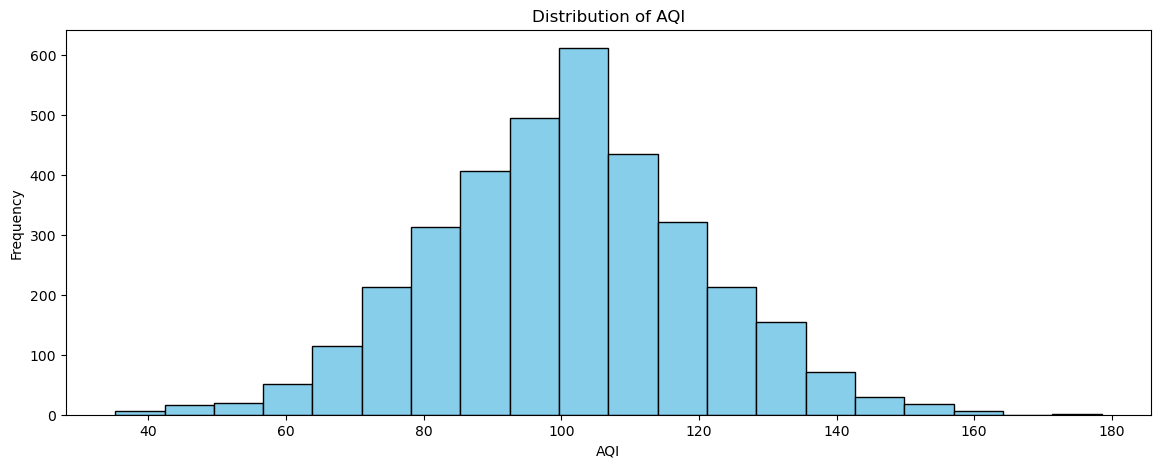

In [55]:
plt.figure(figsize=(14,5))
plt.hist(df_pro2['AQI'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of AQI")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.show()

#### Most readings concentrated between 80 and 120. 
#### This indicates that air quality in the observed regions is generally moderate, with fewer instances of very low or very high AQI.

<h3 style="color:red">AQI Distribution across each region</h3>

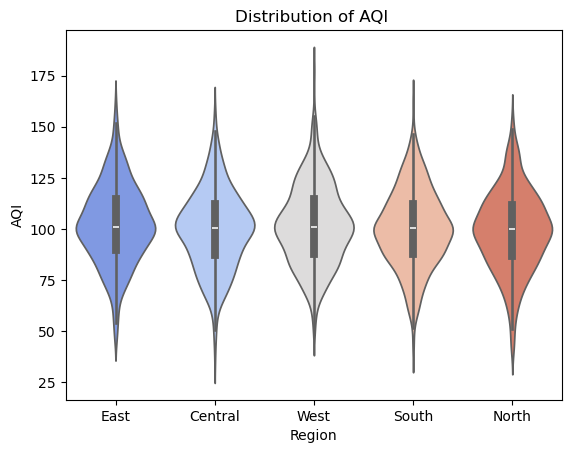

In [56]:
sns.violinplot(x='region',y='AQI',data=df_pro2,hue='region',palette='coolwarm')
plt.xlabel('Region')
plt.ylabel('AQI')
plt.title('Distribution of AQI ')
plt.show()

#### Most regions have similar AQI patterns
#### though west regions has a wider spread, showing more variation and some extreme AQI values compared to the others.

<h3 style="color:red">AQI throught out 2 years</h3>

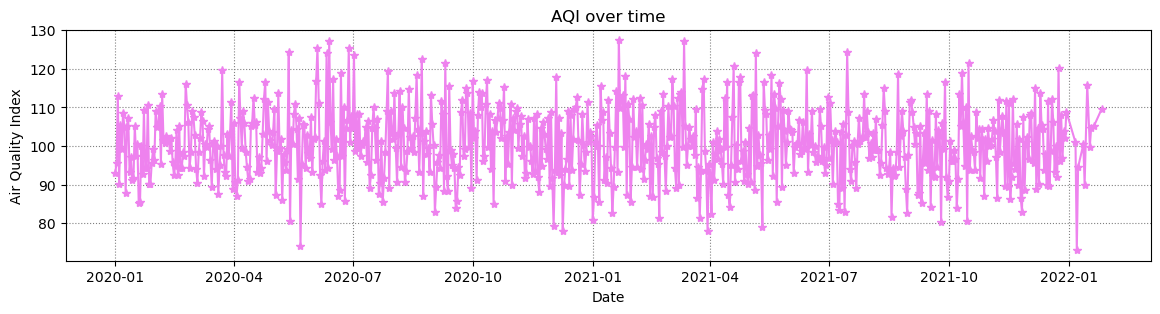

In [57]:
plt.figure(figsize=(14,3))
plt.plot(date_join['date'],date_join['AQI'],color='violet',marker='*')
plt.xlabel('Date')
plt.ylabel('Air Quality Index')
plt.grid(color = 'gray',linestyle = ':')
plt.title('AQI over time')
plt.show()


#### overall AQI remains mostly within the 90–110 range, indicating moderate air quality across the period.
#### The daily fluctuations in the AQI are high

<h3 style="color:red">AQI and Respiratory health relations</h3>

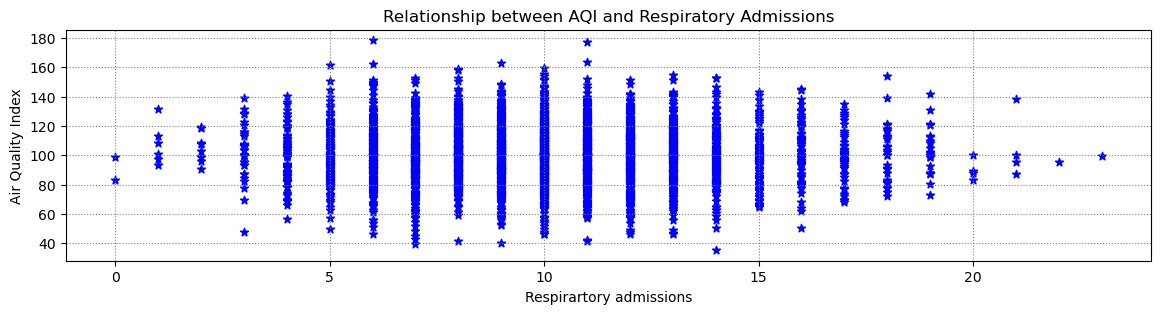

In [58]:
plt.figure(figsize=(14,3))
plt.scatter(df_pro2['respiratory_admissions'],df_pro2['AQI'],color='blue',marker='*')
plt.xlabel('Respirartory admissions')
plt.ylabel('Air Quality Index')
plt.grid(color = 'grey',linestyle = ':')
plt.title('Relationship between AQI and Respiratory Admissions')
plt.show()


#### No strong connections between AQI and respiratory admissions

<h3 style="color:red">Relation between AQI and Weather</h3>

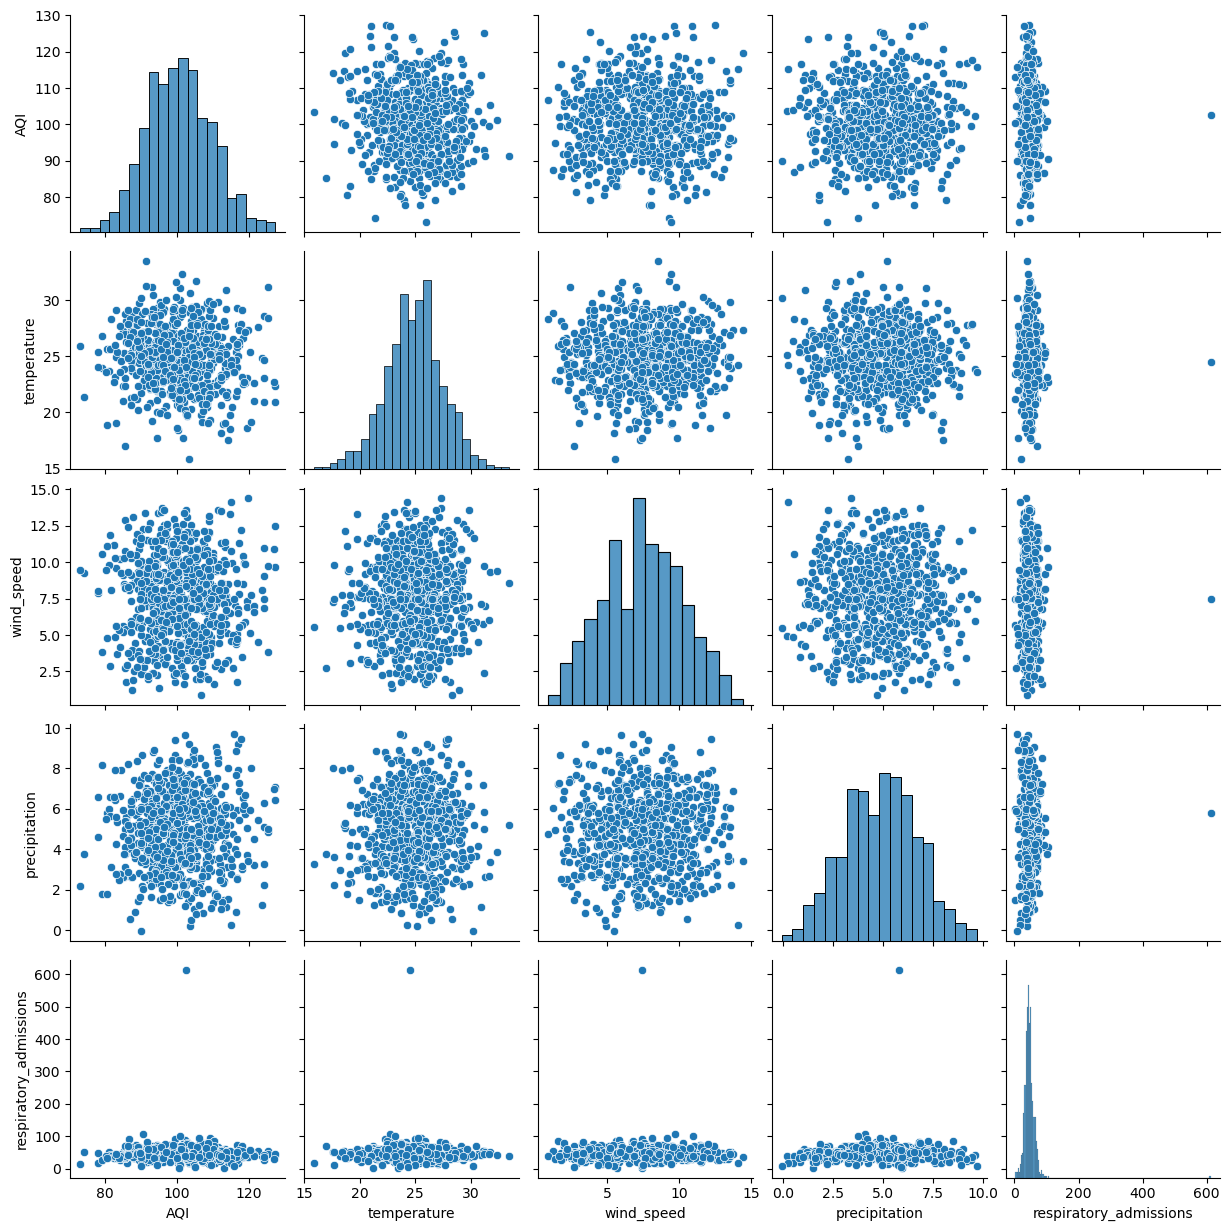

In [59]:
sns.pairplot(date_join[['AQI','temperature','wind_speed','precipitation','respiratory_admissions']])
plt.show()

#### No strong linear correlations visible between any pair of variables. 
#### This suggests that AQI, temperature, wind speed, precipitation and respiratory admissions appear to vary independently in the given data.

<h3 style="color:red">Relation between Public Transport usage and AQI</h3>

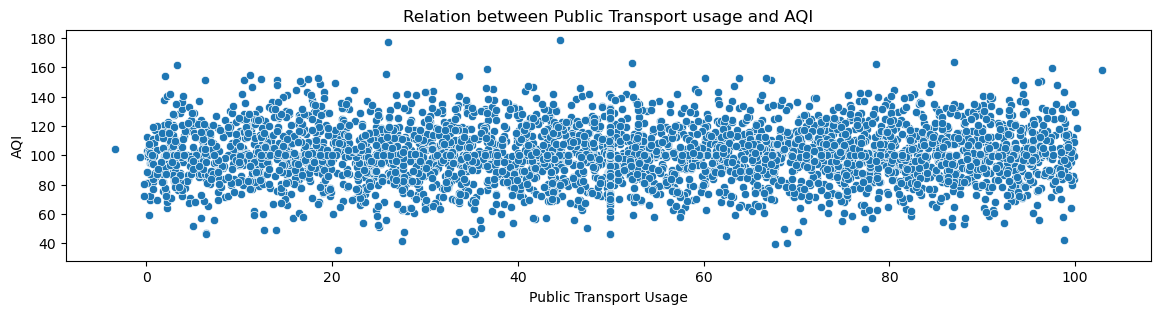

In [77]:
plt.figure(figsize=(14,3))
sns.scatterplot(x='public_transport_usage',y='AQI',data=df_pro2)
plt.xlabel('Public Transport Usage')
plt.ylabel('AQI')
plt.title('Relation between Public Transport usage and AQI')
plt.show()

#### No clear relation is formed between AQI and usage of public transport

<h3 style="color:red">AQI and Industrial Activities</h3>

Text(0.5, 1.0, 'AQI vs Industrial Activity')

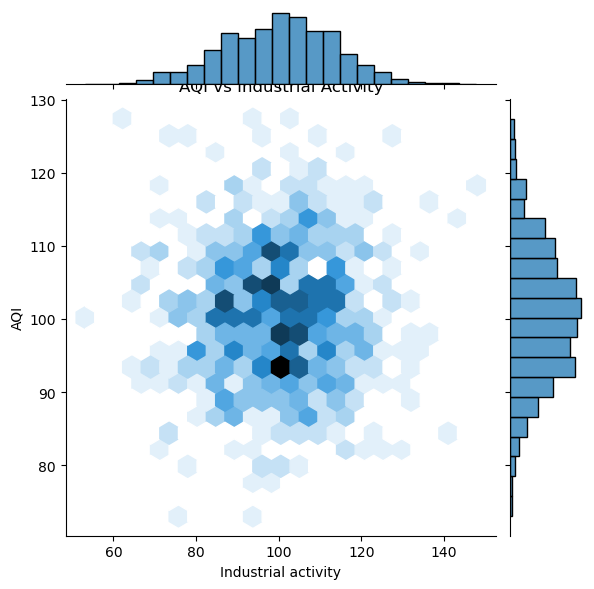

In [60]:
sns.jointplot(x='industrial_activity',y='AQI',data=date_join,kind='hex')
plt.xlabel('Industrial activity')
plt.ylabel('AQI')
plt.title('AQI vs Industrial Activity')

#### The chart indicates that the frequency of AQI is high at moderate industrial activity values  
#### Histograms indicate that both AQI and industrial activity values are centred around the mid-range,
#### suggesting a moderate but notable association between the two.

<h3 style="color:red">AQI and Construction Activity</h3>

Text(0.5, 1.0, 'AQI and Construction Activity')

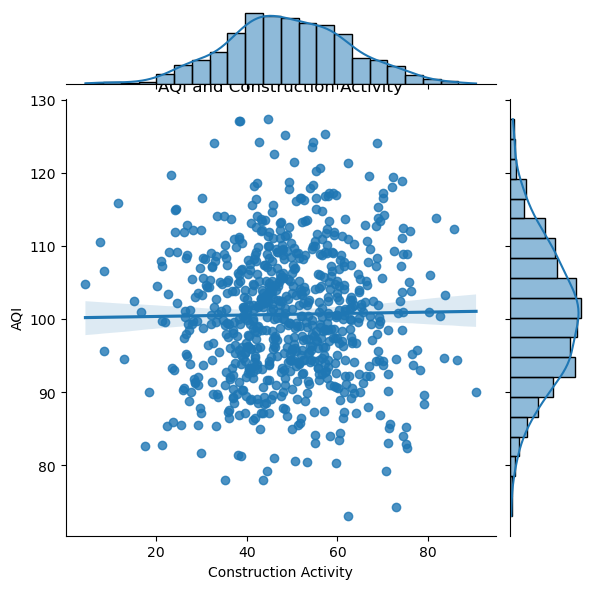

In [61]:
sns.jointplot(x='construction_activity',y='AQI',data=date_join,kind='reg')
plt.xlabel('Construction Activity')
plt.ylabel('AQI')
plt.title('AQI and Construction Activity')

#### The spread is larger in the chart showning no linear correlation between AQI and Construction Activity

<h3 style="color:red">Correlation between Industrial Activities and Chemical Pollutants</h3>

In [62]:
poll = df_reg[['industrial_activity','NO2','SO2','O3','CO','AQI']].median()
corr = poll[['industrial_activity','NO2','SO2','O3','CO','AQI']].corr()

In [63]:
corr

,industrial_activity,NO2,SO2,O3,CO,AQI
industrial_activity,1.000000,-0.615551,0.925635,-0.080132,-0.327336,-0.581635
NO2,-0.615551,1.000000,-0.775450,0.004712,0.914020,0.419609
SO2,0.925635,-0.775450,1.000000,-0.150307,-0.554292,-0.780542
O3,-0.080132,0.004712,-0.150307,1.000000,0.245907,0.334641
CO,-0.327336,0.914020,-0.554292,0.245907,1.000000,0.313234
AQI,-0.581635,0.419609,-0.780542,0.334641,0.313234,1.000000


<Axes: >

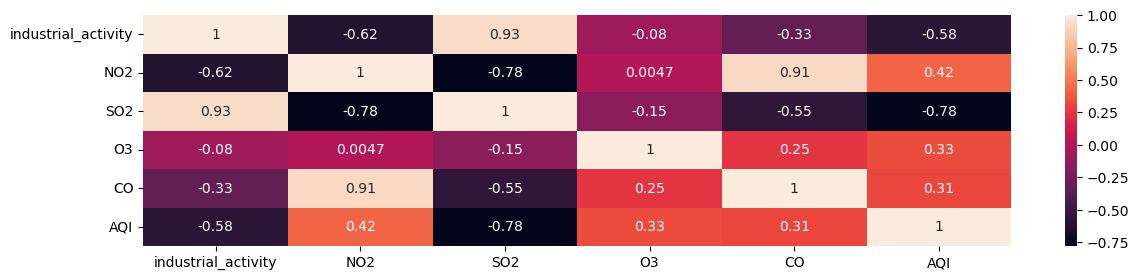

In [64]:
plt.figure(figsize=(14,3))
sns.heatmap(corr,annot=True,cmap='rocket')

#### Industrial activity and SO2 shows strong positive correlation suggests that industrial activity is the main contributor of SO2
#### AQI shows moderate correlation with pollutants which is positive towards O3, CO, NO2 

<h3 style="color:red">Relation between consrtuction activities and Particulate matter with Respiratory Health</h3>

In [65]:
parti=df_reg[['PM2.5','PM10','construction_activity','AQI','respiratory_admissions']].mean()

In [66]:
corr2 = parti.corr()

Text(0.5, 1.0, 'Construction activities and Particulate matter on AQI')

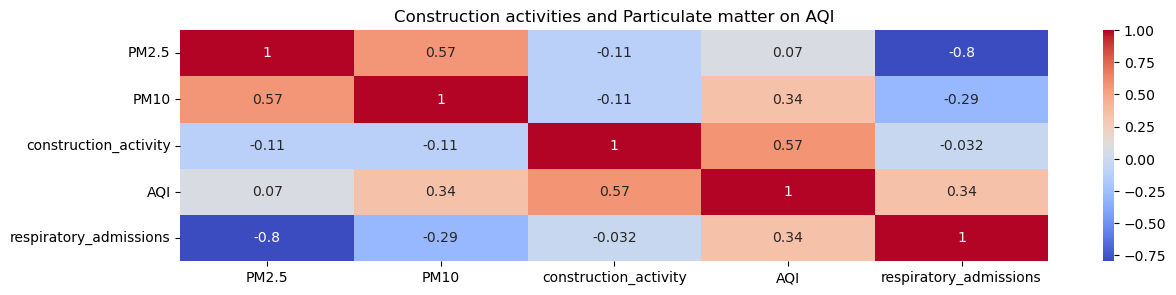

In [67]:
plt.figure(figsize=(14,3))
sns.heatmap(corr2,annot=True,cmap='coolwarm')
plt.title('Construction activities and Particulate matter on AQI')

#### The construction activity is contributing to the higher AQI ie. Air pollution
#### Also the PM10 have a very small impact on AQI
#### No particulate matter or construction activities influencing the respiratory admissions according to this data

<h3 style="color:red">Respiratory Admissions in each Region</h3>

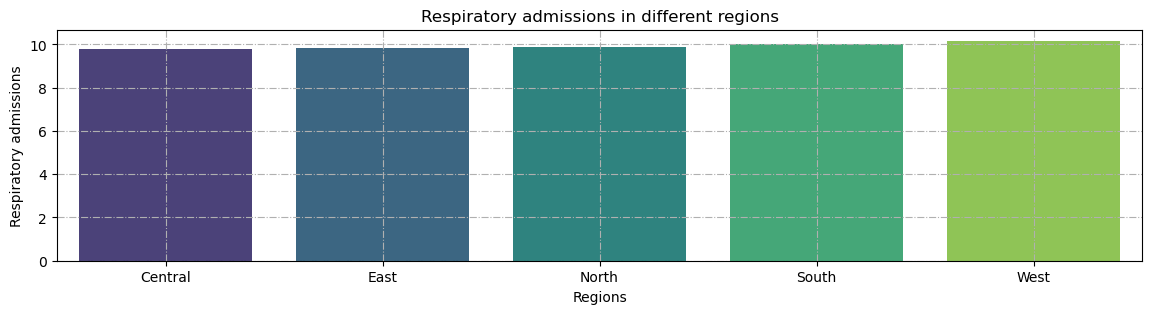

In [68]:
group_ra = df_pro2.groupby('region')['respiratory_admissions'].mean().reset_index()
plt.figure(figsize=(14,3))
sns.barplot(x='region',y='respiratory_admissions',data=group_ra,hue='region',palette='viridis')
plt.xlabel('Regions')
plt.ylabel('Respiratory admissions')
plt.grid(linestyle='-.')
plt.title('Respiratory admissions in different regions')
plt.show()


#### The values are almost similar across all the regions, with the West region showing slightly higher admissions compared to the others.

<h3 style="color:red">Health Impact Levels</h3>

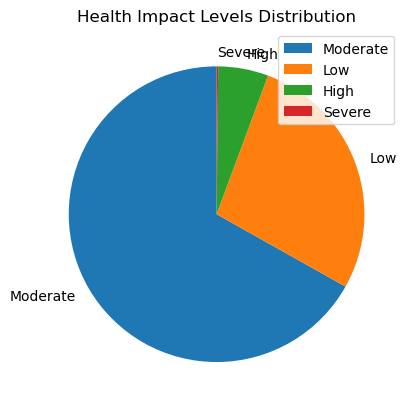

In [69]:

health_imp = df_pro2['health_impact_level'].value_counts()
plt.pie(health_imp,labels=health_imp.index,startangle=90)
plt.title("Health Impact Levels Distribution")
plt.legend()
plt.show()

#### Most cases fall under the Moderate category, followed by Low, while High and Severe impacts are relatively rare.
#### Still there are cases under high and severe levels

<h3 style="color:red">Impact of Lockdown</h3>

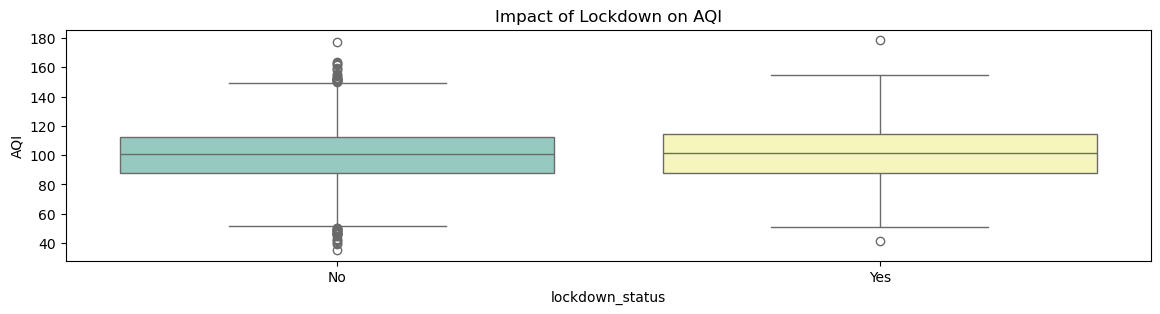

In [79]:
plt.figure(figsize=(14,3))
sns.boxplot(x='lockdown_status', y='AQI', data=df_pro2,hue='lockdown_status', palette="Set3")
plt.title("Impact of Lockdown on AQI")
plt.show()

#### AQI value is slightly higher and more spread out during the Lockdown 
#### It shows Lock down doesn't reduce AQI uniformly, some additional factors are influencing AQI

<h3 style="color:red">Impact of School Closures</h3>

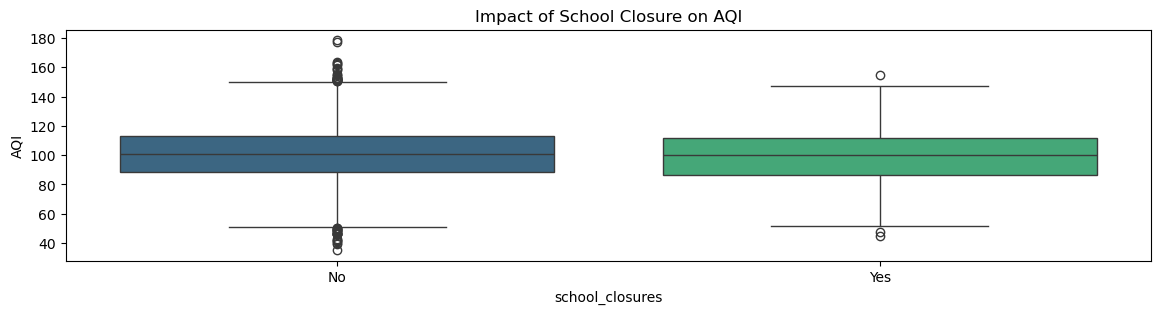

In [78]:
plt.figure(figsize=(14,3))
sns.boxplot(x='school_closures', y='AQI', data=df_pro2,hue='school_closures', palette="viridis")
plt.title("Impact of School Closure on AQI")
plt.show()

#### The boxes are almost is same in height , indicates that there is no big difference in AQI on School closures 

<h3 style="color:red">Relation between Respiratory Health and Vehicle count</h3>

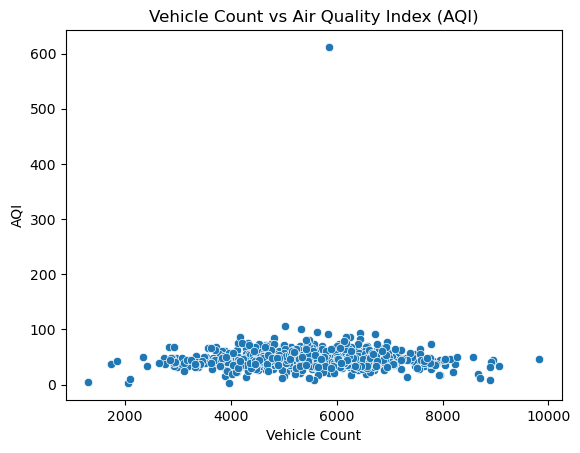

In [72]:
sns.scatterplot(data=date_join, x='vehicle_count', y='respiratory_admissions')
plt.title('Vehicle Count vs Air Quality Index (AQI)')
plt.xlabel('Vehicle Count')
plt.ylabel('AQI')
plt.show()

#### No direct relation is visible between Vehicles and respiratory health

### **INSIGHTS**

#### --> Eventhough regional differences are less, West shows higher AQI variation and more health stress.
#### --> Central,East and South region need specific care as these regions shown severe case of health impact
#### --> Industrial activity strongly affects SO₂; construction raises particulate matter also contributes to higher AQI.
#### --> Health impact is mostly moderate but spikes reports in some regions
#### --> No direct weather influences causes fluctuations in the Air pollution
#### --> Mobility patterns doesn't make any big difference in AQI and health impacts


### **CONCLUSION**

#### -This analysis highlights the relationship between air quality indicators, industrial and construction activities,and   respiratory health outcomes across different regions. 
#### -AQI shows fluctuations slightly across different regions, also the respiratory admissions are high in the west and south regions 
####  -Industrial activity was found to be a primary driver of SO₂ emissions, while construction activities contributed significantly to the Air Quality index, signalling that proper monitoring in these areas is necessary.
#### -Overall, the majority of health impacts were moderate, but the presence of high and severe cases (Central, South and East region) suggests that vulnerable groups (Respiratory patients, allergic people,etc) remain at considerable risk. 

### **RECOMMENDATIONS**

#### --> stricter regulations on industrial emissions such as SO2 (can be introduced new Technologies)
#### --> Regulations on construction sites to reduce dust and to increase green cover/vegetation
#### --> Real-time data collection on the West region, including AQI, health and weather, for the readiness of authorities and the health care group